## Importing Libraries

In [178]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
import random
from sklearn.feature_extraction.text import CountVectorizer

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [179]:
# Read the file and use encoding ISO08859-1
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')

# Show the first 5 rows
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Data Exploration

In [180]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


### Investigate Column Types

In [181]:
df.dtypes

tweet_text                                            object
emotion_in_tweet_is_directed_at                       object
is_there_an_emotion_directed_at_a_brand_or_product    object
dtype: object

All the columns data types are objects

In [182]:
# Check for null values
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

From the above output, `emotion_in_tweet_is_directed_at` has very high number of null values (**5802**) and `tweet_text` only having **1** null value

In [183]:
# Statistical summary
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [184]:
emotion_counts = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

emotion_counts.head()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

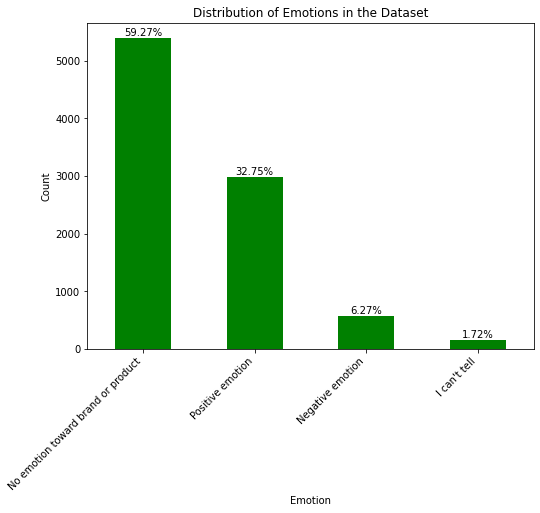

In [185]:
# Plot a bar chart
plt.figure(figsize=(8, 6))
emotion_counts.plot(kind='bar', color='g')
plt.title('Distribution of Emotions in the Dataset')
plt.xlabel('Emotion')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')

# Add percentage labels
total_tweets = len(df)
for i, count in enumerate(emotion_counts):
    percentage = (count / total_tweets) * 100
    plt.text(i, count + 5, f'{percentage:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show();

List of all brands and products mentioned in the dataset

In [186]:
df['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

*iPhone*

In [187]:
iphone_tweets = df[df['emotion_in_tweet_is_directed_at'] == 'iPhone']
iphone_sentiment = iphone_tweets.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
iphone_sentiment.name = 'Tweet Count'
fig = px.bar(iphone_sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product for iPhone')
fig.update_yaxes(title='Frequency')
fig.show();

Majority of tweets that have been directed towards the iPhone are positive, there is still a good amount of tweets that are negative towards the iPhone (though still the minority of tweets nonetheless probably because compared to the other brands or products, there is a smaller fraction of tweets (overall) that are directed towards the iPhone) with a very small fraction that are either neutral or unknown in sentiment or emotion.  
Positive emotion = 184  
Negative emotion = 103  
No emotion toward brand or product = 9  
I can't tell = 1  

*Apple*

In [188]:
apple_tweets = df[df['emotion_in_tweet_is_directed_at'] == 'Apple']
apple_sentiment = apple_tweets.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
apple_sentiment.name = 'Tweet Count'
fig = px.bar(apple_sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product for Apple')
fig.update_yaxes(title='Frequency')
fig.show();

The overwhelming majority of tweets directed to Apple (the company itself) are positive with still a considerable (but still fairly small) fraction that are negative with a very small percentage that are either neutral or unknown in emotion or sentiment.  
Positive emotion = 543  
Negative emotion = 95  
No emotion toward brand or product = 21  
I can't tell = 2

*iPad*

In [189]:
ipad_tweets = df[df['emotion_in_tweet_is_directed_at'] == 'iPad']
ipad_sentiment = ipad_tweets.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
ipad_sentiment.name = 'Tweet Count'
fig = px.bar(ipad_sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product for iPad')
fig.update_yaxes(title='Frequency')
fig.show();

From the above output, it seems like the overwhelmingly majority of tweets directed towards the iPad are positive with still a small but considerable fraction of tweets towards the iPad as negative and a very small fraction of tweets towards the iPad as either neutral or unknown emotion.   
Positive emotion = 793  
Negative emotion = 125  
No emotion toward brand or product = 125  
I can't tell = 4  
Surprisingly enough, there are way more tweets directed to the iPad (an Apple product itself) than the actual company, Apple itself.  

*iPad or iPhone Apps*

In [190]:
apple_app_tweets = df[df['emotion_in_tweet_is_directed_at'] == 'iPad or iPhone App']
apple_app_sentiment = apple_app_tweets.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
apple_app_sentiment.name = 'Tweet Count'
fig = px.bar(apple_app_sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product for iPad or iPhone App')
fig.update_yaxes(title='Frequency')
fig.show();

It seems that all the tweets directed towards an iPad or iPhone App are certain in emotion or sentiment. The overwhelming majority of tweets directed to an iPad or iPhone App are positive with still a small but still considerable fraction of negative tweets and a very small fraction of tweets that are neutral.  
Positive emotion = 397  
Negative emotion = 63  
No emotion toward brand or product = 10

*Google*

In [191]:
google_tweets = df[df['emotion_in_tweet_is_directed_at'] == 'Google']
google_sentiment = google_tweets.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
google_sentiment.name = 'Tweet Count'
fig = px.bar(google_sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product for Google')
fig.update_yaxes(title='Frequency')
fig.show();

Compared to Apple, it seems that there are less tweets directed towards Google (the company itself), but still somewhat follow similar distribution nonetheless. The overwhelming majority of tweets towards Google (the company itself) are still positive with still a considerable but small fraction of tweets that are negative and very small fraction that are either neutral or unknown in emotion or sentiment. Compared to its products, it seems like the company, itself, is more discussed than the products themselves.  
Positive emotion = 346  
Negative emotion = 68  
No emotion toward brand or product = 15  
I can't tell = 1  

*Android*

In [192]:
android_tweets = df[df['emotion_in_tweet_is_directed_at'] == 'Android']
android_sentiment = android_tweets.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
android_sentiment.name = 'Tweet Count'
fig = px.bar(android_sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product for Android')
fig.update_yaxes(title='Frequency')
fig.show();

It seems that all of the tweets directed to Android are certain or known in emotion. The overwhelming majority of tweets towards the Android are positive while there is still a small fraction that is negative with a way smaller fraction that is neutral in emotion or sentiment. Also, compared to the iPhone or the iPad, there is a smaller proportion of tweets directed towards the Android which may suggest larger iPhone or iPad users than Android users according to the data.  
Positive emotion = 69  
Negative emotion = 8 
No emotion toward brand or product = 1  

*Android Apps*

In [193]:
android_app_tweets = df[df['emotion_in_tweet_is_directed_at'] == 'Android App']
android_app_sentiment = android_app_tweets.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
android_app_sentiment.name = 'Tweet Count'
fig = px.bar(android_app_sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product for Android App')
fig.update_yaxes(title='Frequency')
fig.show();

Like the Android product itself, it seems here that all of the tweets directed to an Android app are certain or known in emotion with about similar distribution to the Android as well. The overwhelming majority of tweets directed towards an Android app are positive with still a way small fraction as negative and even a smaller fraction that is neutral towards an Android app.  
Positive emotion = 72  
Negative emotion = 8  
No emotion toward brand or product = 1  

*Other Google Product or Service*

In [194]:
other_google_tweets = df[df['emotion_in_tweet_is_directed_at'] == 'Other Google product or service']
other_google_sentiment = other_google_tweets.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
other_google_sentiment.name = 'Tweet Count'
fig = px.bar(other_google_sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product for other Google product or service')
fig.update_yaxes(title='Frequency')
fig.show();

While still a smaller proportion than the Google company itself, other Google products or services have got more tweets than the Android or the Android apps themselves which can suggest that there is a good possibility that the Android and even the Android apps aren't the most popular (or even most promoted in certain cases) products offered by the company itself according to the data. The overwhelming majority of tweets directed towards another Google product or service are positive with still a considerable but still small fraction of tweets that are negative and then a way smaller fraction of tweets that are either neutral or unknown.  
Positive emotion = 236  
Negative emotion = 47  
No emotion toward brand or product = 9  
I can't tell = 1  

*Other Apple Product or Service*

In [195]:
other_apple_tweets = df[df['emotion_in_tweet_is_directed_at'] == 'Other Apple product or service']
other_apple_sentiment = other_apple_tweets.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
other_apple_sentiment.name = 'Tweet Count'
fig = px.bar(other_apple_sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product for other Apple product or service')
fig.update_yaxes(title='Frequency')
fig.show();

It seems that all the tweets directed towards other Apple products or services are certain or known in emotion. With way less tweets towards other Apple products or services compared to the iPad or even the iPhone, it may suggest that the iPad and the iPhone with their apps are probably the most popular (or among the most popular or even the most promoted or among the most promoted in certain cases) Apple products according to the data. The overwhelming majority of tweets directed towards other Apple products or services are positive while very small fractions of tweets are negative and then neutral.  
Positive emotion = 32  
Negative emotion = 2  
No emotion toward brand or product = 1  

*No Brand or Product Specified*

In [196]:
nan_tweets = df[df['emotion_in_tweet_is_directed_at'].isna()]
nan_sentiment = nan_tweets.groupby('is_there_an_emotion_directed_at_a_brand_or_product').count()['tweet_text']
nan_sentiment.name = 'Tweet Count'
fig = px.bar(nan_sentiment, title='Distribution of is_there_an_emotion_directed_at_a_brand_or_product for No Brand or Product Specified')
fig.update_yaxes(title='Frequency')
fig.show();

In areas where there was no Brand or Product Specified, there was some existence of Positive emotion (**306**), Negative emotion (**51**), and I can't tell (**147**) which is a clear indication that those brands or products were missing and not documented. Majority of No Brand or Product Specified had No emotion toward them (**5297**)  

*All Sentiments for all Brands or Products*

In [197]:
direct = df.groupby('emotion_in_tweet_is_directed_at').count()['tweet_text']
direct.name = 'Tweet Count'
fig = px.bar(direct, title='Distribution of emotion_in_tweet_is_directed_at')
fig.update_yaxes(title='Frequency')
fig.show();

As stated before, the majority of tweets in the dataset where a specified brand or product is directed towards is the iPad. Following the iPad are Apple (the company itself) and an iPad or iPhone app. Apple and its associated products are more frequently discussed in this dataset compared to Google and its associated products. Although Google, the company itself, is directed more towards than the iPhone itself, the iPhone still gets more directed towards than the Android (Google's smartphone product).

The most mentioned (most popular or promoted) Apple product is the iPad which even got more directed tweets than the company itself. According to the data, this can suggest that the iPad is either the most or among the most popular or promoted product associated with Apple.

Other Google products or services are mentioned more than the Android or even the Android apps themselves. According to the data, this can suggest that the Android or even its apps may not be the most popular or among the most popular or promoted product associated with Google.

The iPad is more directed towards to than the Apple company itself (which can suggest product popularity/promotion > brand popularity/promotion) while for Google, the company itself is more directed towards to than its products (which can suggest brand popularity/promotion > product popularity/promotion).  

*Positive Emotion for all Brands or Products*

In [198]:
positive_tweets = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']
positive_direct = positive_tweets.groupby('emotion_in_tweet_is_directed_at').count()['tweet_text']
positive_direct.name = 'Tweet Count'
fig = px.bar(positive_direct, title='Distribution of emotion_in_tweet_is_directed_at for Positive emotion')
fig.update_yaxes(title='Frequency')
fig.show();

As the iPad is the most popular brand or product according to the dataset and the overwhelming majority of tweets directed toward the iPad are positive, iPad will eventually take up the majority of positive tweets followed by Apple (the company itself) and iPad or iPhone app. As all products have (overwhelming) majority tweets as positive, the distribution of Positive emotion tweets are about similar more or less as in general as shown above (with the graph).  

*Negative Emotion for all Brands or Products*

In [199]:
negative_tweets = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']
negative_direct = negative_tweets.groupby('emotion_in_tweet_is_directed_at').count()['tweet_text']
negative_direct.name = 'Tweet Count'
fig = px.bar(negative_direct, title='Distribution of emotion_in_tweet_is_directed_at for Negative emotion')
fig.update_yaxes(title='Frequency')
fig.show();

The distribution of negative tweets is slightly different than that of positive tweets or even in general due to the differing amount of tweets directed towards each brand or product. As iPad has the majority of tweets directed towards in general, the majority of negative tweets would still be directed towards the iPad. However, while iPhone is somewhere in the middle in the number of tweets directed towards in general, it has the 2nd most negative tweets directed towards according to the data (however, the iPhone graph above does show that the fraction of negative tweets directed towards the iPhone is slightly more considerable than other products or brands though).  

*No Emotion Toward Brand or Product (Neutral) for all Brands and Products*

In [200]:
neutral_tweets = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'No emotion toward brand or product']
neutral_direct = neutral_tweets.groupby('emotion_in_tweet_is_directed_at').count()['tweet_text']
neutral_direct.name = 'Tweet Count'
fig = px.bar(neutral_direct, title='Distribution of emotion_in_tweet_is_directed_at for No emotion toward brand or product')
fig.update_yaxes(title='Frequency')
fig.show();

As iPad takes up the majority of tweets in general, it will take up the majority of neutral tweets that directed towards a brand or product followed by Apple and then Google (the companies themselves).  

*I can't tell (Unknown) for all Brands and Products*

In [201]:
unknown_tweets = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'I can\'t tell']
unknown_direct = unknown_tweets.groupby('emotion_in_tweet_is_directed_at').count()['tweet_text']
unknown_direct.name = 'Tweet Count'
fig = px.bar(unknown_direct, title='Distribution of emotion_in_tweet_is_directed_at for I can\'t tell')
fig.update_yaxes(title='Frequency')
fig.show();

As iPad takes up the majority of tweets in general and does have very few tweets where the emotion or sentiment in those tweets are unknown, iPad takes up the majority of tweets that are directed towards a certain brand or product and are of unknown or uncertain sentiment or emotion. Apple has the 2nd most tweets that are directed towards a certain brand or product and are of unknown or uncertain sentiment or emotion. Google, Other Google product or service, and iPhone each have 1 tweet directed towards a certain brand or product and are of unknown or uncertain sentiment or emotion.  

#### Drop Column(s) with Excessive Null Values

Create another copy of the original file for safe keeping

In [202]:
df_copy = df.copy(deep=True)

df_copy.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


Since emotion_in_tweet_is_directed_at is not a reliable predictive variable anymore, drop the column/feature from the dataset.

In [203]:
df.drop(['emotion_in_tweet_is_directed_at'], axis=1, inplace=True)

df.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


### **NLP Data Cleaning and Wrangling**

In [204]:
text = df['tweet_text']

text.head()

0    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
3    @sxsw I hope this year's festival isn't as cra...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
Name: tweet_text, dtype: object

In [205]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_tweets(tweet_series):
    # First, handle any non-string entries
    def convert_to_string(x):
        if pd.isna(x):  # Handle NaN values
            return ""
        return str(x)   # Convert everything else to string
    
    # Convert all entries to strings
    tweets_strings = tweet_series.apply(convert_to_string)
    
    # Convert to lowercase
    tweets_lower = tweets_strings.str.lower()
    
    # Remove URLs
    tweets_no_urls = tweets_lower.apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))
    
    # Remove mentions (@username)
    tweets_no_mentions = tweets_no_urls.apply(lambda x: re.sub(r'@\w+', '', x))
    
    # Remove hashtags (#topic)
    tweets_no_hashtags = tweets_no_mentions.apply(lambda x: re.sub(r'#\w+', '', x))
    
    # Remove punctuation
    tweets_no_punct = tweets_no_hashtags.apply(lambda x: re.sub(r'[^\w\s]', '', x))
    
    # Remove numbers
    def remove_numbers(tweet): 
        tweet = str(tweet)
        tokens = tweet.split(' ')
        new_tokens = []
        for token in tokens: 
            if any(char.isdigit() for char in token) == False: 
                new_tokens.append(token)
        new_tweet = ' '.join(new_tokens)
        return new_tweet
     
    tweets_no_numbers = tweets_no_punct.apply(remove_numbers)
    
    # Remove extra whitespace
    tweets_clean = tweets_no_numbers.apply(lambda x: ' '.join(x.split()))
    
    # Tokenization
    tweets_tokenized = tweets_clean.apply(lambda x: word_tokenize(x) if x.strip() else [])
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.remove('against')
    stop_words.remove('won')
    tweets_no_stopwords = tweets_tokenized.apply(lambda x: [word for word in x if word not in stop_words])
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tweets_lemmatized = tweets_no_stopwords.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    
    # Concatenate tokens back into sentences
    tweets_final = tweets_lemmatized.apply(lambda x: ' '.join(x))
    
    return tweets_final

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [206]:
cleaned_tweets = clean_tweets(text)

print("Original tweets:\n", text)
print("\nCleaned tweets:\n", cleaned_tweets)

Original tweets:
 0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
9088                        Ipad everywhere. #SXSW {link}
9089    Wave, buzz... RT @mention We interrupt your re...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
9092    Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...
Name: tweet_text, Length: 9093, dtype: object

Cleaned tweets:
 0       iphone hr tweeting dead need upgrade plugin st...
1       know awesome ipadiphone app youll likely appre...
2                                          wait also sale
3          hope year festival isnt crashy year iphone app
4       great stuff fri marissa mayer google tim

In [207]:
df['cleaned_tweets'] = cleaned_tweets

In [209]:
df.drop(columns='tweet_text', axis=1, inplace=True)

df.head()

,is_there_an_emotion_directed_at_a_brand_or_product,cleaned_tweets
0,Negative emotion,iphone hr tweeting dead need upgrade plugin st...
1,Positive emotion,know awesome ipadiphone app youll likely appre...
2,Positive emotion,wait also sale
3,Negative emotion,hope year festival isnt crashy year iphone app
4,Positive emotion,great stuff fri marissa mayer google tim oreil...


### One-Hot Encoding Tokens with CountVectorizer

In [210]:
vectorizer = CountVectorizer(min_df=2)
df_vec = vectorizer.fit_transform(df['cleaned_tweets'])
count_vect_df = pd.DataFrame(df_vec.todense(), columns=vectorizer.get_feature_names_out())
df = pd.concat([df, count_vect_df], axis=1)

In [212]:
df.drop(['cleaned_tweets'], axis=1, inplace=True)

df

,is_there_an_emotion_directed_at_a_brand_or_product,______,_______quot,aapl,aaron,ab,ability,able,abnormal,absolutely,...,ûï,ûïbestû,ûïcheckin,ûïcoming,ûïline,ûïmore,ûïthe,ûïwinû,ûò,ûó
0,Negative emotion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Positive emotion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Positive emotion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Negative emotion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Positive emotion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088,Positive emotion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9089,No emotion toward brand or product,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9090,No emotion toward brand or product,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9091,No emotion toward brand or product,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We are now going to drop any available Null values in our dataset

In [213]:
df.dropna(inplace=True)

df

,is_there_an_emotion_directed_at_a_brand_or_product,______,_______quot,aapl,aaron,ab,ability,able,abnormal,absolutely,...,ûï,ûïbestû,ûïcheckin,ûïcoming,ûïline,ûïmore,ûïthe,ûïwinû,ûò,ûó
0,Negative emotion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Positive emotion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Positive emotion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Negative emotion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Positive emotion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088,Positive emotion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9089,No emotion toward brand or product,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9090,No emotion toward brand or product,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9091,No emotion toward brand or product,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Separating out Training Input and Output from each other

In [215]:
x_train_df = df.drop(['is_there_an_emotion_directed_at_a_brand_or_product'], axis=1)
x_train_df_cols = list(x_train_df.columns)
for col in x_train_df_cols: 
    x_train_df[col] = x_train_df[col].astype("Int64")
    df[col] = df[col].astype("Int64")
x_train_df

,______,_______quot,aapl,aaron,ab,ability,able,abnormal,absolutely,absolutley,...,ûï,ûïbestû,ûïcheckin,ûïcoming,ûïline,ûïmore,ûïthe,ûïwinû,ûò,ûó
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
y_train_df = df['is_there_an_emotion_directed_at_a_brand_or_product']
y_train_df

0                         Negative emotion
1                         Positive emotion
2                         Positive emotion
3                         Negative emotion
4                         Positive emotion
                       ...                
9088                      Positive emotion
9089    No emotion toward brand or product
9090    No emotion toward brand or product
9091    No emotion toward brand or product
9092    No emotion toward brand or product
Name: is_there_an_emotion_directed_at_a_brand_or_product, Length: 9093, dtype: object

### Complex Data Patterns  

Exploring correlation between tokens and sentiment of tweet (positive and negative)

In [217]:
encoded_entries = df.copy(deep=True)
encoded_entries['is_there_an_emotion_directed_at_a_brand_or_product'] = encoded_entries['is_there_an_emotion_directed_at_a_brand_or_product']\
    .map({'Positive emotion': 1, 'Negative emotion': -1, 'No emotion toward brand or product': 0, 'I can\'t tell': 0})
corr_matrix = encoded_entries.corr()

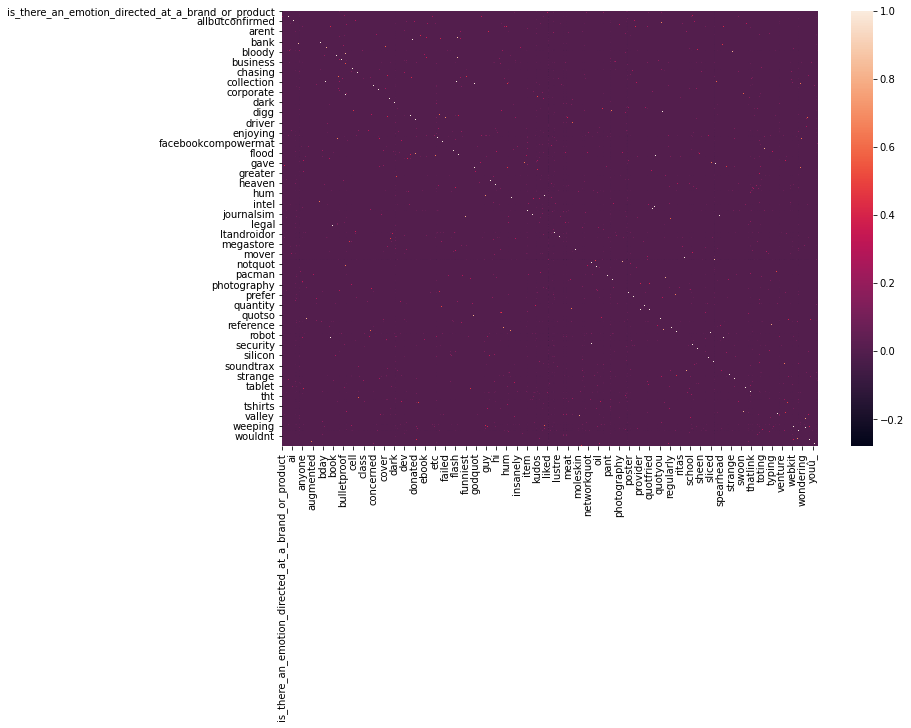

In [225]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix)
plt.show();

The correlation matrix as a heatmap. In a sea of purple that indicates little or no correlation (weak correlation), dots of lighter colors can indicate strong correlation among certain predictive variables.

In [220]:
correlations = corr_matrix['is_there_an_emotion_directed_at_a_brand_or_product']
correlations

is_there_an_emotion_directed_at_a_brand_or_product    1.000000
______                                               -0.014734
_______quot                                           0.006166
aapl                                                  0.015043
aaron                                                -0.006943
                                                        ...   
ûïmore                                                0.006166
ûïthe                                                -0.020052
ûïwinû                                               -0.006943
ûò                                                   -0.005128
ûó                                                   -0.002004
Name: is_there_an_emotion_directed_at_a_brand_or_product, Length: 4725, dtype: float64

In [224]:
positive_corr = correlations.nlargest(21)
positive_corr = positive_corr[1:]
positive_corr.name = 'Correlation Coefficient'
fig = px.bar(positive_corr, title='Top 25 tokens that correlate with positive emotion')
fig.update_xaxes(title='Token').update_yaxes(title='Coefficient Value')
fig.show();

This graph shows the correlation between different tokens (words) and positive emotional content. The data is presented as a bar chart, with the correlation coefficient on the y-axis ranging from 0 to 0.12, and various tokens listed on the x-axis.  
The top 5 tokens with the strongest positive emotional correlation are:

* "cool" - approximately 0.115  
* "awesome" - about 0.09  
* "glad" - roughly 0.085  
* "love" - around 0.075  
* "perfect/cool" (tied) - approximately 0.075  

The correlation coefficients gradually decrease as we move down the list, with tokens like "begin," "apple," "marketing," and "ever" showing weaker but still positive correlations around 0.05.

In [229]:
negative_corr = correlations.nsmallest(20)
negative_corr.name = 'Correlation Coefficient'
fig = px.bar(negative_corr, title='Top 20 tokens that correlate with negative emotion', orientation='h')
fig.update_xaxes(title='Coefficient Value').update_yaxes(title='Token')
fig.show();

This graph presents the correlation between various tokens and negative emotional content.   
Top negative correlations:

* "fascist" has the strongest negative correlation at about -0.08
* "fade" follows at around -0.07
* "delegate" and "classiest" show similar negative correlations
* "swisher," "money," and "button" are also among the more strongly negatively correlated terms  

When comparing this to the positive emotion correlations from the previous graph, we can note:

- The magnitude of negative correlations is somewhat lower than positive ones  
- The types of words are quite different, with less obvious emotional content in many cases  

#### Exploring correlation between token and Neutrality tweet

In [226]:
neutral_entries = df.copy(deep=True)
neutral_entries['is_there_an_emotion_directed_at_a_brand_or_product'] = neutral_entries['is_there_an_emotion_directed_at_a_brand_or_product']\
    .map({'Positive emotion': 0, 'Negative emotion': 0, 'No emotion toward brand or product': 1, 'I can\'t tell': 0})
neutral_corr_matrix = neutral_entries.corr()

In [227]:
neutral_correlations = neutral_corr_matrix['is_there_an_emotion_directed_at_a_brand_or_product']
neutral_correlations

is_there_an_emotion_directed_at_a_brand_or_product    1.000000
______                                               -0.002377
_______quot                                          -0.002797
aapl                                                 -0.009269
aaron                                                 0.012297
                                                        ...   
ûïmore                                               -0.002797
ûïthe                                                -0.002797
ûïwinû                                                0.012297
ûò                                                    0.009779
ûó                                                   -0.018277
Name: is_there_an_emotion_directed_at_a_brand_or_product, Length: 4725, dtype: float64

In [228]:
neutral_corr = neutral_correlations.nlargest(21)
neutral_corr = neutral_corr[1:]
neutral_corr.name = 'Correlation Coefficient'
fig = px.bar(neutral_corr, title='Top 20 tokens that correlate with neutral emotion')
fig.update_xaxes(title='Token').update_yaxes(title='Coefficient Value')
fig.show();

In [230]:
non_neutral_corr = neutral_correlations.nsmallest(20)
non_neutral_corr.name = 'Correlation Coefficient'
fig = px.bar(non_neutral_corr, title='Top 20 tokens that correlate with non-neutral emotion', orientation='h')
fig.update_xaxes(title='Coefficient Value').update_yaxes(title='Token')
fig.show();

#### Exploring correlation between tokens and unknown emotion

In [231]:
unknown_entries = df.copy(deep=True)
unknown_entries['is_there_an_emotion_directed_at_a_brand_or_product'] = unknown_entries['is_there_an_emotion_directed_at_a_brand_or_product']\
    .map({'Positive emotion': 0, 'Negative emotion': 0, 'No emotion toward brand or product': 0, 'I can\'t tell': 1})
unknown_corr_matrix = unknown_entries.corr();

In [232]:
unknown_correlations = unknown_corr_matrix['is_there_an_emotion_directed_at_a_brand_or_product']
unknown_correlations

is_there_an_emotion_directed_at_a_brand_or_product    1.000000
______                                                0.049708
_______quot                                          -0.001960
aapl                                                 -0.003667
aaron                                                -0.001960
                                                        ...   
ûïmore                                               -0.001960
ûïthe                                                -0.001960
ûïwinû                                               -0.001960
ûò                                                   -0.005914
ûó                                                   -0.005605
Name: is_there_an_emotion_directed_at_a_brand_or_product, Length: 4725, dtype: float64

In [233]:
unknown_corr = unknown_correlations.nlargest(21)
unknown_corr = unknown_corr[1:]
unknown_corr.name = 'Correlation Coefficient'
fig = px.bar(unknown_corr, title='Top 20 tokens that correlate with unknown emotion')
fig.update_xaxes(title='Token').update_yaxes(title='Coefficient Value')
fig.show();

In [234]:
known_corr = unknown_correlations.nsmallest(20)
known_corr.name = 'Correlation Coefficient'
fig = px.bar(known_corr, title='Top 20 tokens that correlate with certain emotion', orientation='h')
fig.update_xaxes(title='Coefficient Value').update_yaxes(title='Token')
fig.show();

#### Exploring interactions among tokens together

In [235]:
token_corr_matrix = corr_matrix.drop(['is_there_an_emotion_directed_at_a_brand_or_product'], axis=1)
token_corr_matrix = token_corr_matrix.iloc[1:]
token_corr_matrix

,______,_______quot,aapl,aaron,ab,ability,able,abnormal,absolutely,absolutley,...,ûï,ûïbestû,ûïcheckin,ûïcoming,ûïline,ûïmore,ûïthe,ûïwinû,ûò,ûó
______,1.000000,-0.000467,-0.000874,-0.000467,-0.000467,-0.000660,-0.001984,-0.000467,-0.000809,-0.000467,...,-0.004279,-0.000467,-0.000934,-0.000467,-0.000467,-0.000467,-0.000467,-0.000467,-0.001409,-0.001335
_______quot,-0.000467,1.000000,-0.000412,-0.000220,-0.000220,-0.000311,-0.000935,-0.000220,-0.000381,-0.000220,...,-0.002017,-0.000220,-0.000440,-0.000220,-0.000220,-0.000220,-0.000220,-0.000220,-0.000664,-0.000629
aapl,-0.000874,-0.000412,1.000000,-0.000412,-0.000412,-0.000582,-0.001750,-0.000412,-0.000713,-0.000412,...,-0.003774,-0.000412,-0.000824,-0.000412,-0.000412,-0.000412,-0.000412,-0.000412,-0.001242,0.071655
aaron,-0.000467,-0.000220,-0.000412,1.000000,-0.000220,-0.000311,-0.000935,-0.000220,-0.000381,-0.000220,...,-0.002017,-0.000220,-0.000440,-0.000220,-0.000220,-0.000220,-0.000220,-0.000220,-0.000664,-0.000629
ab,-0.000467,-0.000220,-0.000412,-0.000220,1.000000,-0.000311,-0.000935,-0.000220,-0.000381,-0.000220,...,-0.002017,-0.000220,-0.000440,-0.000220,-0.000220,-0.000220,-0.000220,-0.000220,-0.000664,-0.000629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ûïmore,-0.000467,-0.000220,-0.000412,-0.000220,-0.000220,-0.000311,-0.000935,-0.000220,-0.000381,-0.000220,...,-0.002017,-0.000220,-0.000440,-0.000220,-0.000220,1.000000,-0.000220,-0.000220,-0.000664,-0.000629
ûïthe,-0.000467,-0.000220,-0.000412,-0.000220,-0.000220,-0.000311,-0.000935,-0.000220,-0.000381,-0.000220,...,-0.002017,-0.000220,-0.000440,-0.000220,-0.000220,-0.000220,1.000000,-0.000220,-0.000664,-0.000629
ûïwinû,-0.000467,-0.000220,-0.000412,-0.000220,-0.000220,-0.000311,-0.000935,-0.000220,-0.000381,-0.000220,...,-0.002017,-0.000220,-0.000440,-0.000220,-0.000220,-0.000220,-0.000220,1.000000,0.301183,-0.000629
ûò,-0.001409,-0.000664,-0.001242,-0.000664,-0.000664,-0.000939,-0.002822,-0.000664,-0.001150,-0.000664,...,0.010482,-0.000664,-0.001328,-0.000664,-0.000664,-0.000664,-0.000664,0.301183,1.000000,-0.001899


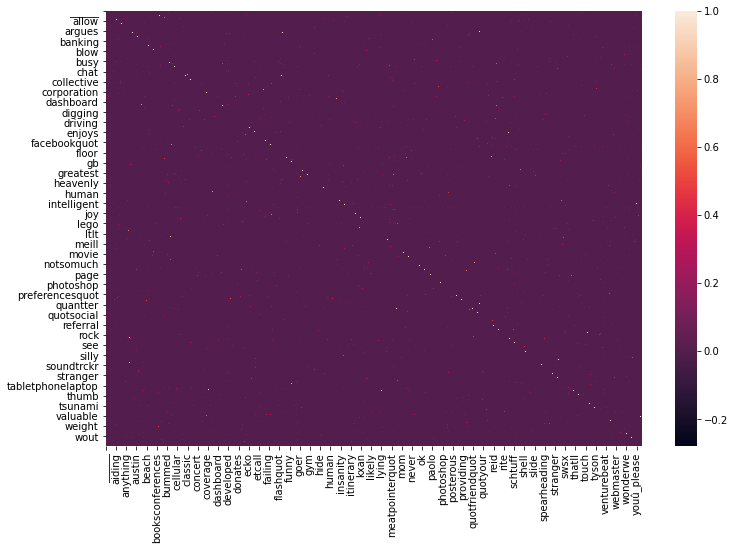

In [236]:
plt.figure(figsize=(12, 8))
sns.heatmap(token_corr_matrix)
plt.show();

In the sea of purple (which indicates little to no correlation), the dots of lighter colors on the matrix indicate strong correlation among individual tokens together (aside correlation between same tokens together which is of course, 1.0 in correlation value)

In [237]:
tokens_list = list(token_corr_matrix.index)
strongest_corr = {}

for i in range(0, len(tokens_list)):
    for k in range(0, len(tokens_list)):
        corr_val = token_corr_matrix.iloc[i, k]
        if (abs(corr_val) >= 0.8) and (corr_val != 1.0) and ((tokens_list[k], tokens_list[i]) not in strongest_corr): 
            token_pair = (tokens_list[i], tokens_list[k])
            strongest_corr[token_pair] = corr_val

strongest_corr = sorted(strongest_corr.items(), key=lambda x:x[1], reverse=True)
strongest_corr[:20]

[(('includes', 'uberguide'), 0.9853964307739691),
 (('interrupt', 'regularly'), 0.9805266060112072),
 (('programming', 'regularly'), 0.9805266060112072),
 (('quotgroupon', 'socialtypequot'), 0.9681925058345924),
 (('density', 'trump'), 0.9607567275802246),
 (('maes', 'maggie'), 0.9573215538055452),
 (('mark', 'quotthink'), 0.9554277523790554),
 (('mark', 'tweetquot'), 0.9554277523790554),
 (('extraordinary', 'league'), 0.954435213116725),
 (('delegate', 'novelty'), 0.9534101016955618),
 (('jc', 'penney'), 0.9486572019855367),
 (('regularly', 'scheduled'), 0.9447548653614706),
 (('bread', 'revolutionary'), 0.9427975188454132),
 (('bread', 'sliced'), 0.9427975188454132),
 (('ninety', 'viewed'), 0.9427975188454122),
 (('tinkering', 'viewed'), 0.9427975188454122),
 (('mtg', 'rec'), 0.9427975188454121),
 (('mtg', 'voluntary'), 0.9427975188454121),
 (('augmented', 'reality'), 0.9382072476208845),
 (('cameron', 'spearhead'), 0.9353628696911839)]

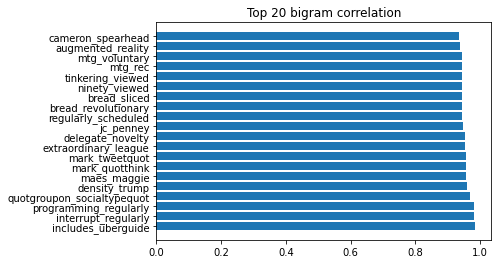

In [240]:
top_20 = dict(strongest_corr[:20])
top_20_two = {}
for pair in top_20: 
    pair_str = pair[0] + '_' + pair[1]
    top_20_two[pair_str] = top_20[pair]
plt.barh(y=list(top_20_two.keys()), width=list(top_20_two.values()))
plt.title("Top 20 bigram correlation");

There are definitely pairs of tokens that are very strongly correlated to each other which can indicate that these pair of tokens often appear in the same tweet together with very similar or same sentiment more or less or are associated with the same sentiment (more or less). Some feature selection probably has to be done in order to reduce dependence among predictive variables.

#### More Complex Relationships to Explore

* Most frequent tokens overall and each sentiment  
* Number of tokens in the tweet  
* Whether similarity among tweets can predict sentiment

In [241]:
positive_entries = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']
positive_entries.drop(['is_there_an_emotion_directed_at_a_brand_or_product'], axis=1, inplace=True)

In [242]:
negative_entries = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']
negative_entries.drop(['is_there_an_emotion_directed_at_a_brand_or_product'], axis=1, inplace=True)

In [243]:
neutral_entries = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'No emotion toward brand or product']
neutral_entries.drop(['is_there_an_emotion_directed_at_a_brand_or_product'], axis=1, inplace=True)

In [244]:
non_neutral_entries = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != 'No emotion toward brand or product']
non_neutral_entries.drop(['is_there_an_emotion_directed_at_a_brand_or_product'], axis=1, inplace=True)

In [245]:
unknown_entries = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'I can\'t tell']
unknown_entries.drop(['is_there_an_emotion_directed_at_a_brand_or_product'], axis=1, inplace=True)

In [246]:
known_entries = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != 'I can\'t tell']
known_entries.drop(['is_there_an_emotion_directed_at_a_brand_or_product'], axis=1, inplace=True)

In [247]:
token_sum = x_train_df.sum()
top_20_overall = token_sum.nlargest(20)
top_20_overall

link       4297
rt         2953
google     2204
ipad       2149
apple      1828
store      1502
iphone     1247
new        1088
austin      850
app         785
amp         722
launch      681
social      623
popup       597
today       573
circle      542
sxsw        481
network     469
get         454
android     436
dtype: int64

In [250]:
import plotly.express as px 
data = dict(
    tweets = list(top_20_overall.values), 
    token = list(top_20_overall.index)
)
fig = px.funnel(data, x='tweets', y='token', title='Top 20 Tokens by Frequency')
fig.show();